### Template Matching

---

#### Full Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('Data/dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

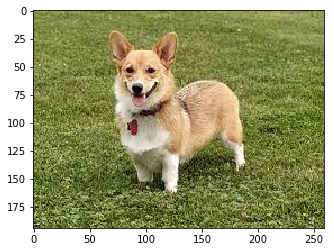

In [3]:
plt.imshow(full)

In [4]:
full.shape

(194, 259, 3)

#### Template Image
*Fotoğraftaki köpeğin yüzünü template olarak belirliyoruz. Daha önceden kesip **dog_face** olarak kaydettiğimiz fotoğrafı okuma işlemini gerçekleştiriyoruz.*

In [5]:
face= cv2.imread('Data/dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

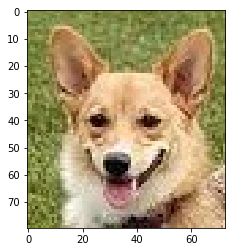

In [6]:
plt.imshow(face)

In [7]:
face.shape

(80, 73, 3)

#### Template Matching Metodu

**eval()** fonksiyonu kendisine verilen karekter dizisini değerlendirir ve bir sonuç döner.Nasıl kullanıldığına bakalım.

In [8]:
sum([1,2,3])

6

In [9]:
mystring = 'sum'

In [10]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [11]:
myfunc = eval(mystring)

In [12]:
myfunc([1,2,3])

6

---

*Köpek fotoğrafının koordinatları*

In [13]:
height, width,channels = face.shape

In [14]:
width

73

In [15]:
height

80

In [16]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,my_method)

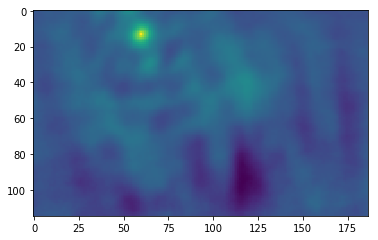

In [17]:
plt.imshow(res)

In [18]:
# Fotoğrafın tamamı
full = cv2.imread('Data/dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# Fotoğrafın sadece yüz kısmı
face= cv2.imread('Data/dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# Comparison işlemi için metodlarımızı bir listede tutuyoruz.
# Biraz sonra string olarak tuttuğumuz bu metodları eval() fonksiyonun içine göndereceğiz.
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

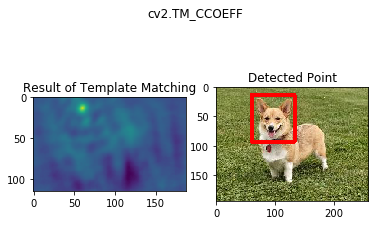

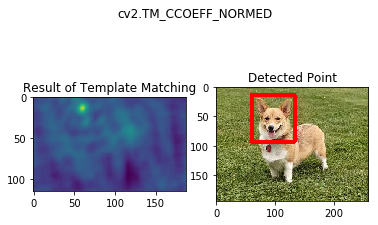

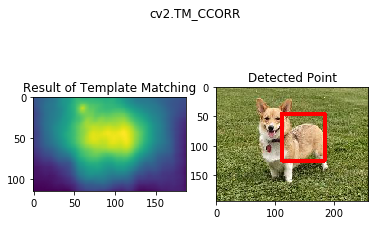

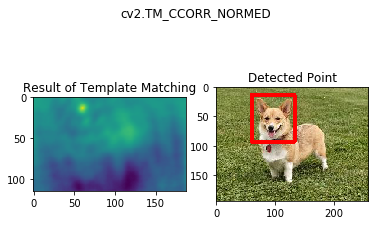

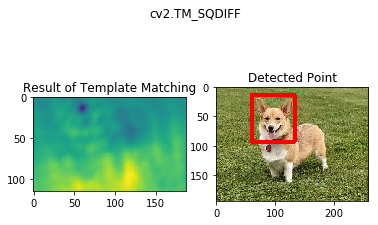

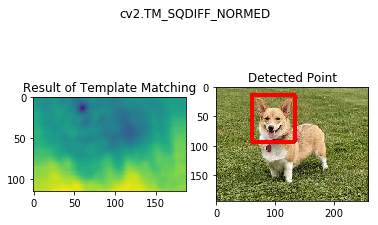

In [19]:
for m in methods:
    
    # Fotoğrafımızın bir kopyasını alıyoruz
    full_copy = full.copy()
    
    # string olarak tanımladığımız fonksiyonları evale gönderiyoruz
    method = eval(m)

    # Metodumuzla birlikte eşleme işleminin gerçekleştirilmesi
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Konum
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Dikdörtgen çizme işlemi
    # -----------------------
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # sağ alt için koordinat belirle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Kırmızı renkli dikdörtgen çizimi
    cv2.rectangle(full_copy,top_left, bottom_right, (255,0,0), 5)

    # Ekrana basma işlemi
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Template Matching işlemi')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection işlemi')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    